# <center> Proyecto Monza

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle 

In [2]:
train = pd.read_csv('data/byke_train.csv', sep = ',', decimal = '.', header = 0, encoding = 'latin1')
train.head()

,VelocidadViento,Humedad,Temperatura,DíaFestivo,DíaSemana,DíaNoLaborable,Estación,Clima,Fecha,Año,Mes,Hora,Total
0,0.0,0.81,0.24,0,6,0,1,1,2011-01-01,0,1,0,18
1,0.0,0.80,0.22,0,6,0,1,1,2011-01-01,0,1,1,45
2,0.0,0.80,0.22,0,6,0,1,1,2011-01-01,0,1,2,37
3,0.0,0.75,0.24,0,6,0,1,1,2011-01-01,0,1,3,18
4,0.0,0.75,0.24,0,6,0,1,1,2011-01-01,0,1,4,5


In [3]:
# Barajar shuffle el nuevo DataFrame df
train = shuffle(train)
train.head()

,VelocidadViento,Humedad,Temperatura,DíaFestivo,DíaSemana,DíaNoLaborable,Estación,Clima,Fecha,Año,Mes,Hora,Total
9349,0.1343,0.83,0.56,0,0,0,2,2,2012-05-06,1,5,0,134
12654,0.1343,0.88,0.52,0,4,1,4,2,2012-10-25,1,10,20,347
2135,0.3284,0.83,0.64,0,3,1,2,1,2011-04-27,0,4,20,224
3312,0.0896,0.54,0.70,0,0,0,3,1,2011-06-26,0,6,23,83
11729,0.2836,0.62,0.74,0,5,1,3,1,2012-09-07,1,9,19,570


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
VelocidadViento,13905.0,0.190215,0.122282,0.00,0.1045,0.194,0.2537,0.8507
Humedad,13905.0,0.628570,0.192186,0.00,0.4800,0.630,0.7800,1.0000
Temperatura,13905.0,0.497470,0.191592,0.02,0.3400,0.500,0.6600,1.0000
DíaFestivo,13905.0,0.028767,0.167156,0.00,0.0000,0.000,0.0000,1.0000
DíaSemana,13905.0,3.000575,2.005243,0.00,1.0000,3.000,5.0000,6.0000
DíaNoLaborable,13905.0,0.682632,0.465469,0.00,0.0000,1.000,1.0000,1.0000
Estación,13905.0,2.511111,1.104850,1.00,2.0000,3.000,3.0000,4.0000
Clima,13905.0,1.423157,0.638485,1.00,1.0000,1.000,2.0000,4.0000
Año,13905.0,0.500827,0.500017,0.00,0.0000,1.000,1.0000,1.0000
Mes,13905.0,6.555627,3.433961,1.00,4.0000,7.000,10.0000,12.0000


In [5]:
train.describe(exclude = [np.number]).T

,count,unique,top,freq
Fecha,13905,731,2011-10-24,24


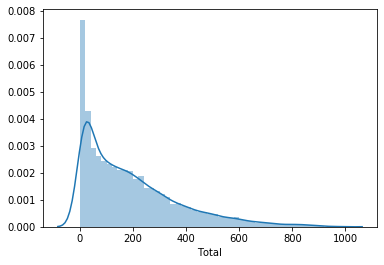

In [6]:
sns.distplot(train['Total'])

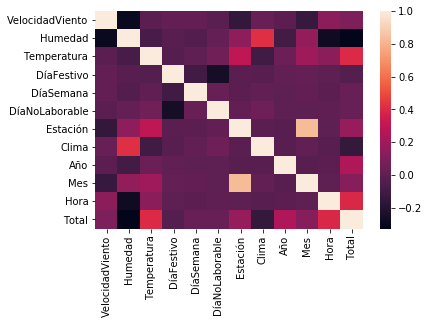

In [7]:
sns.heatmap(train.corr(), 
        xticklabels = train.corr().columns,
        yticklabels = train.corr().columns)

In [8]:
num = train.select_dtypes(exclude='object')
num_corr = num.corr()
num_corr = num_corr['Total'].sort_values(ascending=False).head(5).to_frame()
num_corr

,Total
Total,1.000000
Temperatura,0.401059
Hora,0.394698
Año,0.249572
Estación,0.175081


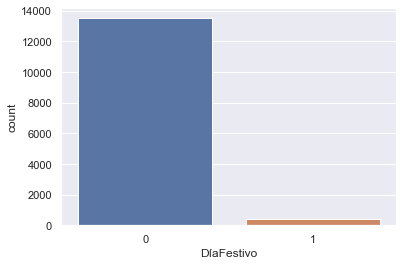

In [9]:
sns.set(style = "darkgrid")
sns.countplot(x = 'DíaFestivo', data = train)

In [10]:
train.drop(['DíaFestivo', 'Fecha', 'Estación'], axis = 1, inplace = True)

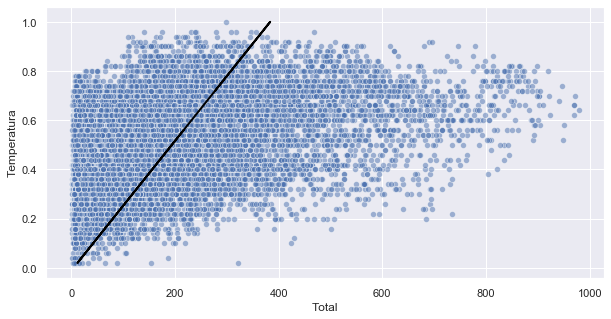

In [11]:
from sklearn.linear_model import LinearRegression

le = LinearRegression()

le.fit(train['Temperatura'].values.reshape(-1,1), train['Total'].values)

pred = le.predict(train['Temperatura'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
sns.scatterplot(train['Total'], train['Temperatura'], alpha=0.5)
plt.plot(pred, train['Temperatura'], color='black', linewidth=2)
plt.show()

## Feature Engineering

In [12]:
y = train['Total']
X = train.drop(['Total'], axis = 1)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_features= ['DíaSemana', 'DíaNoLaborable', 'Clima', 'Año', 'Mes', 'Hora']

X['DíaSemana'] = le.fit_transform(X['DíaSemana'])
X['DíaNoLaborable'] = le.fit_transform(X['DíaNoLaborable'])
X['Clima'] = le.fit_transform(X['Clima'])
X['Año'] = le.fit_transform(X['Año'])
X['Mes'] = le.fit_transform(X['Mes'])
X['Hora'] = le.fit_transform(X['Hora'])

In [14]:
numeric_features = ['VelocidadViento', 'Humedad', 'Temperatura']
cat_features = ['DíaSemana', 'DíaNoLaborable', 'Clima', 'Año', 'Mes', 'Hora']
features = cat_features + numeric_features

In [15]:
X = pd.get_dummies(X[cat_features + numeric_features]).reset_index(drop=True)
X

,DíaSemana,DíaNoLaborable,Clima,Año,Mes,Hora,VelocidadViento,Humedad,Temperatura
0,0,0,1,1,4,0,0.1343,0.83,0.56
1,4,1,1,1,9,20,0.1343,0.88,0.52
2,3,1,0,0,3,20,0.3284,0.83,0.64
3,0,0,0,0,5,23,0.0896,0.54,0.70
4,5,1,0,1,8,19,0.2836,0.62,0.74
...,...,...,...,...,...,...,...,...,...
13900,1,1,0,0,5,12,0.1642,0.37,0.76
13901,6,0,0,1,4,0,0.1045,0.48,0.52
13902,5,1,0,1,9,2,0.0896,0.73,0.54
13903,0,0,0,1,0,16,0.2985,0.29,0.22


# Models XGBOOTS

In [16]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [18]:
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.08,
                max_depth = 5, alpha = 10, n_estimators = 600)
xg_reg.fit(X_train, y_train)

[17:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [19]:
# PREDICCIONES
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 57.829976


In [20]:
y_test

11493    166
2843     206
555       70
7368      62
8684     138
        ... 
7615      99
5272     148
6226       5
3112     214
11997    807
Name: Total, Length: 2781, dtype: int64

In [21]:
preds

array([109.12619, 233.61479,  78.22224, ...,  22.19437, 213.85692,
       700.6124 ], dtype=float32)

# Models RandomForest

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

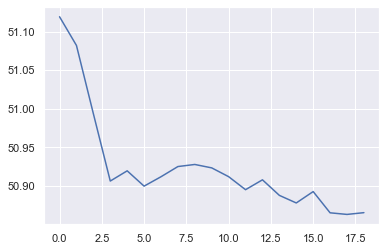

In [24]:
rmse = []
for i in range(100, 2000, 100):
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
    regressor.fit(X_train, y_train)
    # PREDICCIONES
    y_pred = regressor.predict(X_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.plot(rmse)

In [25]:
# AJUSTAR EL MODELO CON 200O ARBOLES
regressor = RandomForestRegressor(n_estimators = 2000, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [26]:
# PREDICCIONES
y_pred = regressor.predict(X_test)

In [27]:
# CALIFICAR MODELO
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29.37277606462218
Mean Squared Error: 2586.2757926771696
Root Mean Squared Error: 50.855440148298484


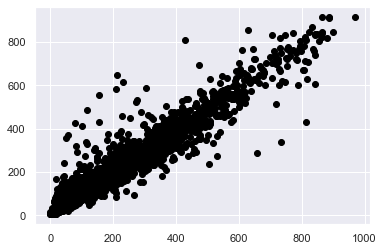

In [28]:
plt.plot(y_test, y_pred, 'o', color = 'black')

### TRANFORMACIONES

In [29]:
from scipy.stats import skew

In [30]:
skewed_feats = X[numeric_features].apply(lambda x: skew(x))
skewed_feats = skewed_feats.index

In [31]:
X[skewed_feats] = np.log1p(X[skewed_feats])
y2 = np.log1p(y)

In [32]:
X2 = pd.get_dummies(X[cat_features + numeric_features]).reset_index(drop=True)
X2.head()

,DíaSemana,DíaNoLaborable,Clima,Año,Mes,Hora,VelocidadViento,Humedad,Temperatura
0,0,0,1,1,4,0,0.126016,0.604316,0.444686
1,4,1,1,1,9,20,0.126016,0.631272,0.418710
2,3,1,0,0,3,20,0.283975,0.604316,0.494696
3,0,0,0,0,5,23,0.085811,0.431782,0.530628
4,5,1,0,1,8,19,0.249669,0.482426,0.553885


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 123)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# AJUSTAR EL MODELO CON 200O ARBOLES
regressor = RandomForestRegressor(n_estimators = 2000, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [36]:
# PREDICCIONES
y_pred = regressor.predict(X_test)

In [37]:
# CALIFICAR MODELO
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2093921555762946
Mean Squared Error: 0.09702522683860133
Root Mean Squared Error: 0.31148872666374516


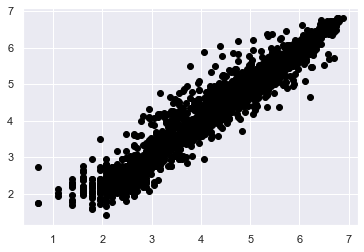

In [41]:
plt.plot(y_test, y_pred, 'o', color = 'black')
#plt.ylim((0,2.3))
#plt.xlim((0,2.3))

In [39]:
y_test

11493    5.117994
2843     5.332719
555      4.262680
7368     4.143135
8684     4.934474
           ...   
7615     4.605170
5272     5.003946
6226     1.791759
3112     5.370638
11997    6.694562
Name: Total, Length: 2781, dtype: float64

In [40]:
y_pred

array([5.11177553, 5.37709673, 4.19405596, ..., 2.22800557, 5.30148139,
       6.65224402])